# Imports

In [1]:
import importlib
import sys
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

In [2]:
!ls ../../../../../../ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/data/encoded_data/Helpdesk

helpdesk_all_normal_3_test.pkl	 helpdesk_all_normal_3_val.pkl
helpdesk_all_normal_3_train.pkl


# Data

### Load Data Files

In [3]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../../../ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/data/encoded_data/Helpdesk/helpdesk_all_normal_3_train.pkl'
# Load the dataset using torch.load
helpdesk_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(helpdesk_train_dataset))  # Should output something like <class 'torch.utils.data.dataset.TensorDataset'>

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../../../ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/data/encoded_data/Helpdesk/helpdesk_all_normal_3_val.pkl'
# Load the dataset using torch.load
helpdesk_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(helpdesk_val_dataset))  # Should output something like <class 'torch.utils.data.dataset.TensorDataset'>

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>
<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


/home/PSPLab/.local/share/virtualenvs/Probabilistic_Suffix_Prediction_U-ED-LSTM_-4nDU3HwC/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator OrdinalEncoder from version 1.5.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/PSPLab/.local/share/virtualenvs/Probabilistic_Suffix_Prediction_U-ED-LSTM_-4nDU3HwC/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.5.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/PSPLab/.local/share/virtualenvs/Probabilistic_Suffi

### Train Data Insights

In [4]:
# Helpdesk Dataset Categories, Features:
helpdesk_all_categories = helpdesk_train_dataset.all_categories

helpdesk_all_categories_cat = helpdesk_all_categories[0]
print(helpdesk_all_categories_cat)

helpdesk_all_categories_num = helpdesk_all_categories[1]
print(helpdesk_all_categories_num)

for i, cat in enumerate(helpdesk_all_categories_cat):
     print(f"Helpdesk (5) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"Helpdesk (5) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(helpdesk_all_categories_num):
     print(f"Helpdesk (5) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"Helpdesk (5) Amount Numerical: {num[1]}")

[('Activity', 16, {'Assign seriousness': 1, 'Closed': 2, 'Create SW anomaly': 3, 'DUPLICATE': 4, 'EOS': 5, 'INVALID': 6, 'Insert ticket': 7, 'RESOLVED': 8, 'Require upgrade': 9, 'Resolve SW anomaly': 10, 'Resolve ticket': 11, 'Schedule intervention': 12, 'Take in charge ticket': 13, 'VERIFIED': 14, 'Wait': 15}), ('Resource', 24, {'EOS': 1, 'Value 1': 2, 'Value 10': 3, 'Value 11': 4, 'Value 12': 5, 'Value 13': 6, 'Value 14': 7, 'Value 15': 8, 'Value 16': 9, 'Value 17': 10, 'Value 18': 11, 'Value 19': 12, 'Value 2': 13, 'Value 20': 14, 'Value 21': 15, 'Value 22': 16, 'Value 3': 17, 'Value 4': 18, 'Value 5': 19, 'Value 6': 20, 'Value 7': 21, 'Value 8': 22, 'Value 9': 23}), ('VariantIndex', 184, {'1.0': 1, '10.0': 2, '100.0': 3, '103.0': 4, '104.0': 5, '105.0': 6, '107.0': 7, '109.0': 8, '11.0': 9, '110.0': 10, '112.0': 11, '113.0': 12, '114.0': 13, '115.0': 14, '117.0': 15, '118.0': 16, '12.0': 17, '120.0': 18, '121.0': 19, '122.0': 20, '123.0': 21, '124.0': 22, '125.0': 23, '126.0': 24, 

### Input Features for Encoder and Decoder

In [ ]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in helpdesk_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in helpdesk_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

"""
# Decoder features:
dec_feat_cat = enc_feat_cat
dec_feat_num = enc_feat_num
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)
"""

# Decoder features:
dec_feat_cat = ['Activity']
dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['Activity', 'Resource', 'VariantIndex', 'seriousness', 'customer', 'product', 'responsible_section', 'seriousness_2', 'service_level', 'service_type', 'support_section', 'workgroup'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day']]
Features decoder:  [['Activity', 'Resource'], ['case_elapsed_time', 'event_elapsed_time']]


# Model

In [6]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Check and try to get this out of the data objects

# Prediction decoder output sequence length
# seq_len_pred = 4

seq_len_pred = 2

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 4

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=helpdesk_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('Activity', 16, {'Assign seriousness': 1, 'Closed': 2, 'Create SW anomaly': 3, 'DUPLICATE': 4, 'EOS': 5, 'INVALID': 6, 'Insert ticket': 7, 'RESOLVED': 8, 'Require upgrade': 9, 'Resolve SW anomaly': 10, 'Resolve ticket': 11, 'Schedule intervention': 12, 'Take in charge ticket': 13, 'VERIFIED': 14, 'Wait': 15}), ('Resource', 24, {'EOS': 1, 'Value 1': 2, 'Value 10': 3, 'Value 11': 4, 'Value 12': 5, 'Value 13': 6, 'Value 14': 7, 'Value 15': 8, 'Value 16': 9, 'Value 17': 10, 'Value 18': 11, 'Value 19': 12, 'Value 2': 13, 'Value 20': 14, 'Value 21': 15, 'Value 22': 16, 'Value 3': 17, 'Value 4': 18, 'Value 5': 19, 'Value 6': 20, 'Value 7': 21, 'Value 8': 22, 'Value 9': 23}), ('VariantIndex', 184, {'1.0': 1, '10.0': 2, '100.0': 3, '103.0': 4, '104.0': 5, '105.0': 6, '107.0': 7, '109.0': 8, '11.0': 9, '110.0': 10, '112.0': 11, '113.0': 12, '114.0': 13, '115.0': 14, '117.0': 15, '118.0': 16, '12.0': 17, '120.0': 18, '121.0': 19, '122.0': 20, '123.0': 21, '124.0': 22, '12

# Loss Object Creation

In [7]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

# Training Configuration

In [ ]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(comment="Full_Helpdesk_grad_pro_conf_check")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# lambda for L2 (weight, bias, dropout) regularization
# regularization_term = 1e-3

# Start learning rate
learning_rate = 1e-5

# Optimizer and Scheduler
optimizer = torch.optim.AdamW(params=model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-10)

# Epochs
num_epochs = 100

# BATCHING does not work currntly with custom implementation
batch_size = 128

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
# regularization_term = 1.0/(2.0*batch_size)
regularization_term = 1e-4

# shuffle data
shuffle = True

# Teacher forcing: If teacher forcing is greater as 0.5 more targets are used else more predicted
teacher_forcing_ratio = 0.8

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio,}

# For suffix length of 5
# suffix_data_split_value = 4
suffix_data_split_value = seq_len_pred

# GradNorm parameter
use_gradnorm = True
gn_alpha = 1.5
gn_learning_rate = 1e-4

number_tasks = len(dec_feat[0]) + len(dec_feat[1])

gradNorm = {"use_gradnorm":use_gradnorm,
            "number_tasks": number_tasks,
            "gn_alpha":gn_alpha,
            "gn_learning_rate": gn_learning_rate}

trainer = Trainer(device=device,
                  model=model,
                  data_train=helpdesk_train_dataset,
                  data_val=helpdesk_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature = [],
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'Helpdesk_full_grad_norm_proactive_conf_check.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda
Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(16, 8)
    (1): Embedding(24, 9)
    (2): Embedding(184, 30)
    (3): Embedding(3, 3)
    (4): Embedding(370, 44)
    (5): Embedding(23, 9)
    (6): Embedding(9, 5)
    (7-9): 3 x Embedding(6, 4)
    (10): Embedding(8, 5)
    (11): Embedding(6, 4)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(16, 8)
      (1): Embedding(24, 9)
      (2): Embedding(184, 30)
      (3): Embedding(3, 3)
      (4): Embedding(370, 44)
      (5): Embedding(23, 9)
      (6): Embedding(9, 5)
      (7-9): 3 x Embedding(6, 4)
      (10): Embedding(8, 5)
      (11): Embedding(6, 4)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=133, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=133, out_features=128, bias=True)
      (Uf): Linear(in_featur

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 8.4142
Validation: Avg Standard Validation Loss: 8.2144
Validation: Avg Attenuated Validation Loss: 8.0050
Validation Loss for Scheduler: 8.2144
saving model
Epoch [2/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 8.4284
Validation: Avg Standard Validation Loss: 8.1879
Validation: Avg Attenuated Validation Loss: 7.9653
Validation Loss for Scheduler: 8.1879
saving model
Epoch [3/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 8.3979
Validation: Avg Standard Validation Loss: 7.9885
Validation: Avg Attenuated Validation Loss: 7.7617
Validation Loss for Scheduler: 7.9885
saving model
Epoch [4/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 7.5350
Validation: Avg Standard Validation Loss: 6.5342
Validation: Avg Attenuated Validation Loss: 6.0705

# Training Visualization

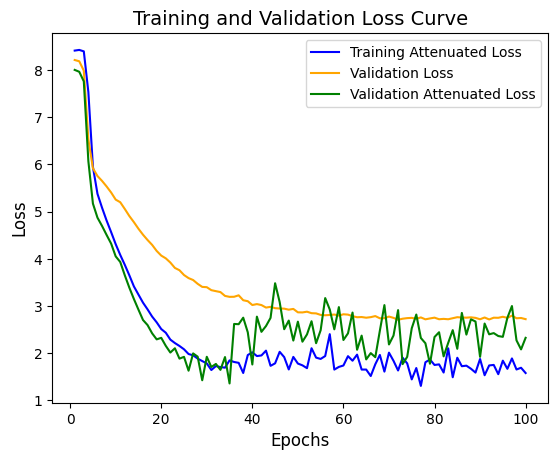

In [9]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()